                            Name  City        District  \
0                      1953 Kafe  Bakı   Səbail rayonu   
1                       3 Bochki  Bakı   Nəsimi rayonu   
2  7 Gözəl Restaurant and Lounge  Bakı   Səbail rayonu   
3                  Ada Restoranı  Bakı  Yasamal rayonu   
4                Adana Restoranı  Bakı    Xətai rayonu   

                      Street Postal Address               Phone      Votes  \
0  Tərlan Əliyarbəyov küçəsi       9 AZ1000  (+99412) 598-31-73  *** 6 səs   
1      Dilarə Əliyeva küçəsi     251 AZ1010  (+99412) 498-08-12  *** 3 səs   
2           Lermontov küçəsi     123 AZ1001  (+99412) 505-02-03  *** 4 səs   
3    Murtuza Muxtarov küçəsi     179 AZ1000  (+99412) 436-83-29  *** 6 səs   
4    Süleyman Vəzirov küçəsi      22 AZ1025  (+99412) 480-29-90  *** 3 səs   

   Rating Stars                Kind  \
0           5.0             Kafelər   
1           5.0         Restoranlar   
2           5.0  Azərbaycan mətbəxi   
3           5.0  Azərbayca

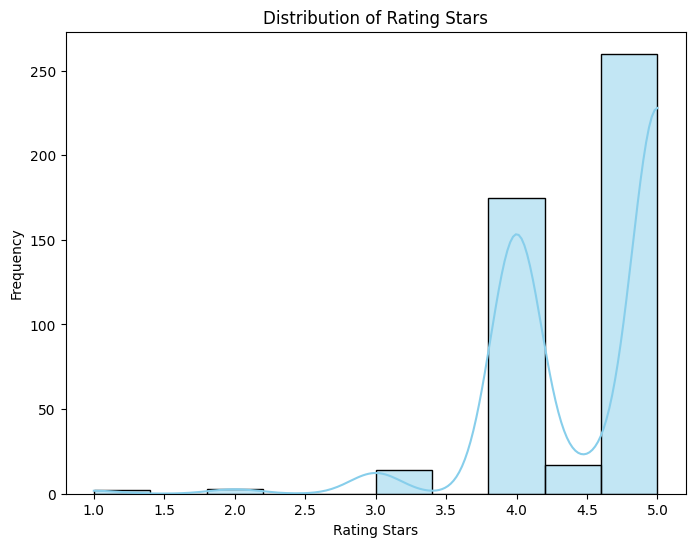

<ipython-input-5-a88aa805642d>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kinds.values, y=top_kinds.index, palette="viridis")


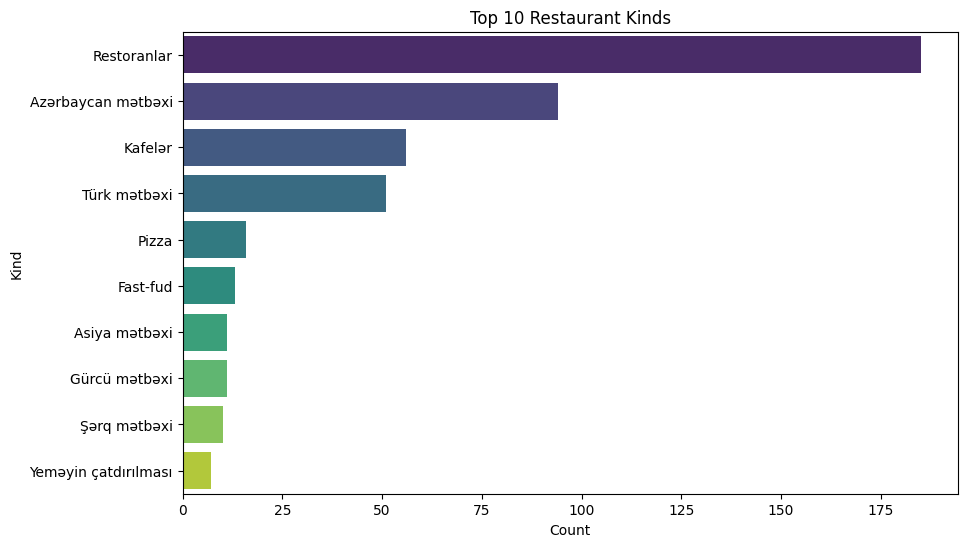

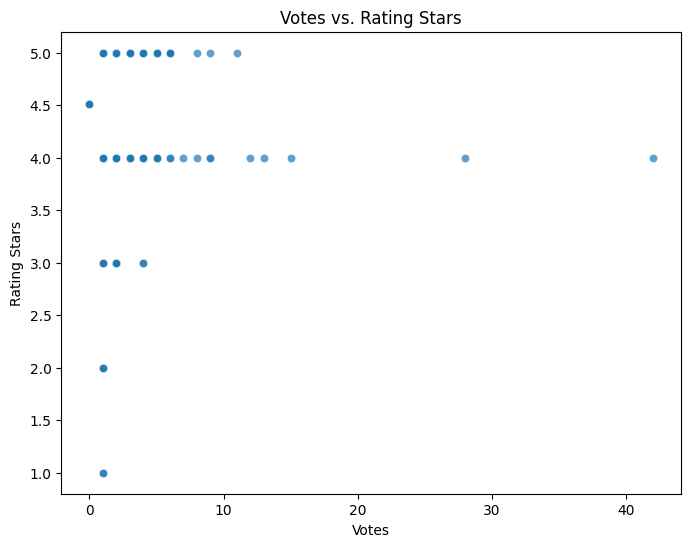

Processed data saved to ./data/processed_data_team_13.csv.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the scraped data CSV
file_path = "./data/scraped_data_team_13.csv"
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(data.head())

# Replace placeholders with NaN
data = data.replace(
    ["No Name", "No Phone", "No Site", "No Stars", "No Rating", "No City", "No District", "No Street", "No Postal Address", "No Kind"],
    pd.NA
)

# Preprocess the "Votes" column to extract numeric values
data["Votes"] = data["Votes"].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notna(x) and re.search(r'\d+', str(x)) else 0)

# Convert relevant columns to numeric
data["Rating Stars"] = pd.to_numeric(data["Rating Stars"], errors="coerce")

# Fill missing values explicitly
data["Name"] = data["Name"].fillna("Unknown")
data["Phone"] = data["Phone"].fillna("Unknown")
data["Site"] = data["Site"].fillna("Not Available")
data["Votes"] = data["Votes"].fillna(0)
data["Rating Stars"] = data["Rating Stars"].fillna(data["Rating Stars"].mean())  # Fill with the average rating
data = data.fillna("Not Specified")  # Fill remaining missing values

# Summary statistics
print(data.describe(include="all"))

# Distribution of `Rating Stars`
plt.figure(figsize=(8, 6))
sns.histplot(data["Rating Stars"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Rating Stars")
plt.xlabel("Rating Stars")
plt.ylabel("Frequency")
plt.show()

# Top 10 Restaurant Kinds
top_kinds = data["Kind"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_kinds.values, y=top_kinds.index, palette="viridis")
plt.title("Top 10 Restaurant Kinds")
plt.xlabel("Count")
plt.ylabel("Kind")
plt.show()

# Relationship between Votes and Rating Stars
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Votes", y="Rating Stars", data=data, alpha=0.7)
plt.title("Votes vs. Rating Stars")
plt.xlabel("Votes")
plt.ylabel("Rating Stars")
plt.show()

# Save cleaned data
processed_file_path = "./data/processed_data_team_13.csv"
data.to_csv(processed_file_path, index=False, encoding="utf-8")
print(f"Processed data saved to {processed_file_path}.")
